# IPL Data Analysis 2008-2023

## Importing Libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import zipfile
import os

## Reading Dataset and Creating Dataframe

In [118]:
pt=pd.read_csv("C:\\Users\\yashs\\Desktop\\python data analysis\\IPL Analysis\\datasets\\ipl_dataset\\points_table.csv")
pt=pd.DataFrame(pt)

 ### Exploratory Data Analysis on Points Table Dataset 

In [119]:
pt.head()

,season,rank,name,short_name,matchesplayed,matcheswon,matcheslost,noresult,matchpoints,nrr,for,against
0,2023,1,Gujarat Titans,GT,14,10,4,0,20,0.809,2450/268.1,2326/279.2
1,2023,2,Chennai Super Kings,CSK,14,8,5,1,17,0.652,2369/254.3,2232/257.5
2,2023,3,Lucknow Super Giants,LSG,14,8,5,1,17,0.284,2253/255.2,2216/259.3
3,2023,4,Mumbai Indians,MI,14,8,6,0,16,-0.044,2592/270.3,2620/272.1
4,2023,5,Rajasthan Royals,RR,14,7,7,0,14,0.148,2419/272.1,2389/273.2


In [120]:
pt.tail()

,season,rank,name,short_name,matchesplayed,matcheswon,matcheslost,noresult,matchpoints,nrr,for,against
131,2008,4,Delhi Capitals,DC,14,7,6,1,15,0.342,2001/233.2,2031/246.4
132,2008,5,Mumbai Indians,MI,14,7,7,0,14,0.570,2080/249.1,2096/269.3
133,2008,6,Kolkata Knight Riders,KKR,14,6,7,1,13,-0.147,1845/242.4,1718/221.4
134,2008,7,Royal Challengers Bangalore,RCB,14,4,10,0,8,-1.160,1983/272.4,2205/261.3
135,2008,8,Deccan Chargers,SRH,14,2,12,0,4,-0.467,2229/270.0,2307/264.3


In [121]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         136 non-null    int64  
 1   rank           136 non-null    int64  
 2   name           136 non-null    object 
 3   short_name     136 non-null    object 
 4   matchesplayed  136 non-null    int64  
 5   matcheswon     136 non-null    int64  
 6   matcheslost    136 non-null    int64  
 7   noresult       136 non-null    int64  
 8   matchpoints    136 non-null    int64  
 9   nrr            136 non-null    float64
 10  for            136 non-null    object 
 11  against        136 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 12.9+ KB


In [122]:
pt.columns

Index(['season', 'rank', 'name', 'short_name', 'matchesplayed', 'matcheswon',
       'matcheslost', 'noresult', 'matchpoints', 'nrr', 'for', 'against'],
      dtype='object')

In [123]:
pt[['matchesplayed', 'matcheswon', 'matcheslost', 'matchpoints', 'nrr']].describe()

,matchesplayed,matcheswon,matcheslost,matchpoints,nrr
count,136.000000,136.000000,136.000000,136.000000,136.000000
mean,14.264706,7.036765,7.036765,14.264706,0.000478
std,0.680254,2.059874,2.038184,4.077463,0.496463
min,14.000000,2.000000,3.000000,4.000000,-1.436000
25%,14.000000,6.000000,5.000000,12.000000,-0.313250
50%,14.000000,7.000000,7.000000,14.000000,0.018000
75%,14.000000,9.000000,8.000000,18.000000,0.316250
max,16.000000,11.000000,13.000000,22.000000,1.107000


In [124]:
x=pt['season'].unique()
x

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008], dtype=int64)

In [125]:
pt.groupby(['season']).name.unique()

season
2008    [Rajasthan Royals, Kings XI Punjab, Chennai Su...
2009    [Delhi Capitals, Chennai Super Kings, Royal Ch...
2010    [Mumbai Indians, Deccan Chargers, Chennai Supe...
2011    [Royal Challengers Bangalore, Chennai Super Ki...
2012    [Delhi Capitals, Kolkata Knight Riders, Mumbai...
2013    [Chennai Super Kings, Mumbai Indians, Rajastha...
2014    [Kings XI Punjab, Kolkata Knight Riders, Chenn...
2015    [Chennai Super Kings, Mumbai Indians, Royal Ch...
2016    [Gujarat Lions, Royal Challengers Bangalore, S...
2017    [Mumbai Indians, Rising Pune Supergiant, Sunri...
2018    [Sunrisers Hyderabad, Chennai Super Kings, Kol...
2019    [Mumbai Indians, Chennai Super Kings, Delhi Ca...
2020    [Mumbai Indians, Delhi Capitals, Sunrisers Hyd...
2021    [Delhi Capitals, Chennai Super Kings, Royal Ch...
2022    [Gujarat Titans, Rajasthan Royals, Lucknow Sup...
2023    [Gujarat Titans, Chennai Super Kings, Lucknow ...
Name: name, dtype: object

In [126]:
pt['name'].unique()

array(['Gujarat Titans', 'Chennai Super Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Punjab Kings', 'Delhi Capitals', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Pune Warriors', 'Deccan Chargers', 'Kochi Tuskers Kerala'],
      dtype=object)

In [127]:
pt.name.value_counts()

Mumbai Indians                 16
Royal Challengers Bangalore    16
Kolkata Knight Riders          16
Delhi Capitals                 16
Chennai Super Kings            14
Rajasthan Royals               14
Kings XI Punjab                13
Sunrisers Hyderabad            11
Deccan Chargers                 5
Punjab Kings                    3
Pune Warriors                   3
Gujarat Titans                  2
Lucknow Super Giants            2
Rising Pune Supergiant          2
Gujarat Lions                   2
Kochi Tuskers Kerala            1
Name: name, dtype: int64

In [128]:
most_points=(pt.groupby(['name']).matchpoints.sum()).sort_values(ascending=False)[:8]
most_points

name
Mumbai Indians                 255
Chennai Super Kings            231
Kolkata Knight Riders          228
Royal Challengers Bangalore    226
Delhi Capitals                 215
Rajasthan Royals               203
Kings XI Punjab                174
Sunrisers Hyderabad            149
Name: matchpoints, dtype: int64

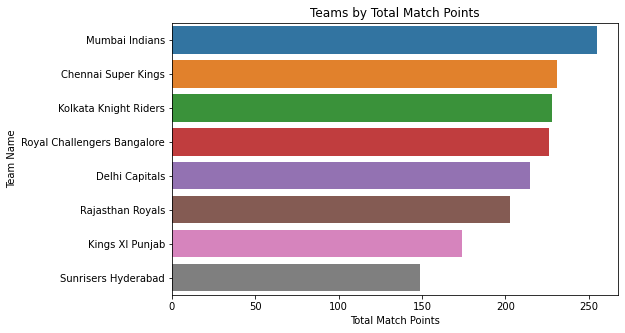

In [129]:
plt.figure(figsize=(8, 5))
sns.barplot(x=most_points.values,y=most_points.index)
plt.ylabel('Team Name')
plt.xlabel('Total Match Points')
plt.title('Teams by Total Match Points')
plt.show()

In [130]:
mp=(pt.groupby(['name','season']).matchpoints.max()).sort_values(ascending=False)[:8]
mp

name                   season
Rajasthan Royals       2008      22
Kings XI Punjab        2014      22
Mumbai Indians         2013      22
Chennai Super Kings    2013      22
Delhi Capitals         2012      22
Kolkata Knight Riders  2012      21
Delhi Capitals         2021      20
Mumbai Indians         2017      20
Name: matchpoints, dtype: int64

In [131]:
mw=pt.groupby(['name']).matcheswon.sum().sort_values(ascending=False)[:8]
mw

name
Mumbai Indians                 127
Chennai Super Kings            114
Kolkata Knight Riders          112
Royal Challengers Bangalore    110
Delhi Capitals                 106
Rajasthan Royals                99
Kings XI Punjab                 87
Sunrisers Hyderabad             74
Name: matcheswon, dtype: int64

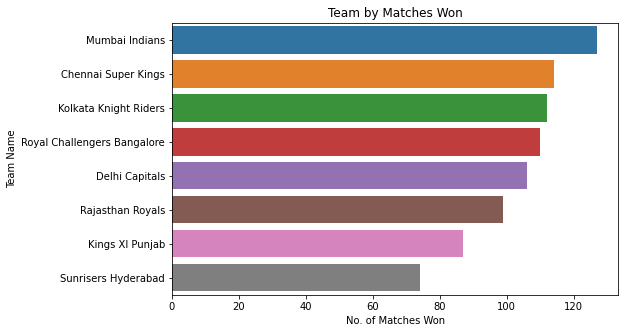

In [132]:
plt.figure(figsize=(8,5))
sns.barplot(x=mw.values,y=mw.index)
plt.xlabel("No. of Matches Won")
plt.ylabel("Team Name")
plt.title("Team by Matches Won")
plt.show()

In [133]:
ml=pt.groupby(['name']).matcheslost.sum().sort_values(ascending=False)[:8]
ml

name
Delhi Capitals                 119
Kolkata Knight Riders          112
Royal Challengers Bangalore    112
Mumbai Indians                 100
Kings XI Punjab                 99
Rajasthan Royals                96
Chennai Super Kings             83
Sunrisers Hyderabad             81
Name: matcheslost, dtype: int64

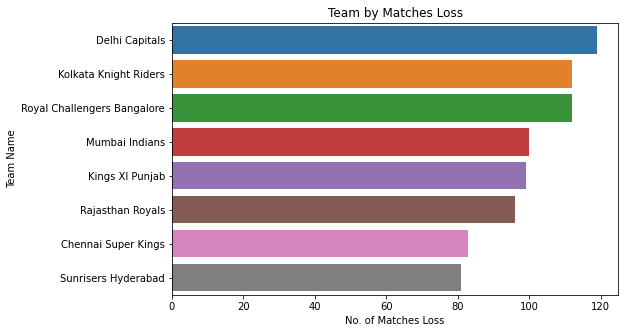

In [134]:
plt.figure(figsize=(8,5))
sns.barplot(x=ml.values,y=ml.index)
plt.xlabel("No. of Matches Loss")
plt.ylabel("Team Name")
plt.title("Team by Matches Loss")
plt.show()

In [135]:
mrr =pt.groupby(['name']).nrr.max().sort_values(ascending=False)[:8]
mrr

name
Mumbai Indians                 1.107
Royal Challengers Bangalore    1.037
Kings XI Punjab                0.968
Chennai Super Kings            0.951
Gujarat Titans                 0.809
Kolkata Knight Riders          0.641
Rajasthan Royals               0.632
Delhi Capitals                 0.617
Name: nrr, dtype: float64

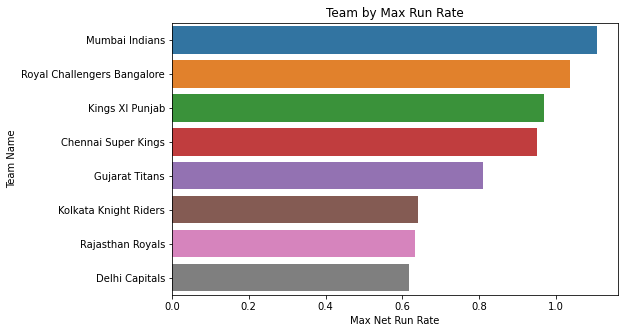

In [136]:
plt.figure(figsize=(8,5))
sns.barplot(x=mrr.values,y=mrr.index)
plt.xlabel("Max Net Run Rate")
plt.ylabel("Team Name")
plt.title("Team by Max Run Rate")
plt.show()

In [137]:
data = {'name': ['Mumbai Indians', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Kings XI Punjab', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Gujarat Titans', 'Mumbai Indians'],
        'season': [2020, 2010, 2015, 2014, 2009, 2016, 2023, 2017],
        'nrr': [1.107, 1.084, 1.037, 0.968, 0.951, 0.932, 0.809, 0.784]}

df = pd.DataFrame(data)
df

,name,season,nrr
0,Mumbai Indians,2020,1.107
1,Mumbai Indians,2010,1.084
2,Royal Challengers Bangalore,2015,1.037
3,Kings XI Punjab,2014,0.968
4,Chennai Super Kings,2009,0.951
5,Royal Challengers Bangalore,2016,0.932
6,Gujarat Titans,2023,0.809
7,Mumbai Indians,2017,0.784


In [138]:
df = df.pivot(index='name', columns='season', values='nrr').reset_index()
df.set_index('name', inplace=True)

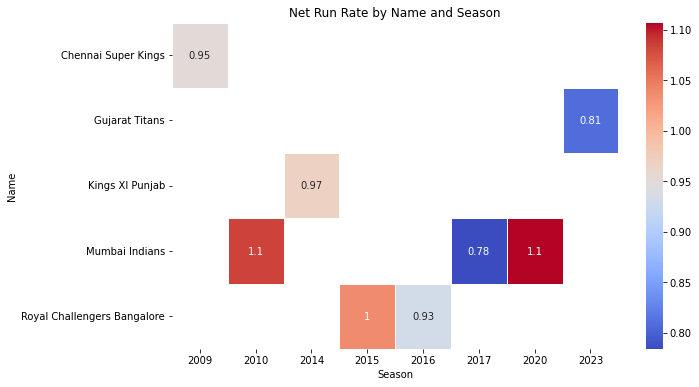

In [139]:
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Net Run Rate by Name and Season')
plt.xlabel('Season')
plt.ylabel('Name')
plt.show()

In [140]:
mp=pt.groupby(['name']).matchesplayed.sum().sort_values(ascending=False)[:8]
mp

name
Delhi Capitals                 228
Kolkata Knight Riders          228
Mumbai Indians                 228
Royal Challengers Bangalore    228
Chennai Super Kings            200
Rajasthan Royals               200
Kings XI Punjab                186
Sunrisers Hyderabad            156
Name: matchesplayed, dtype: int64

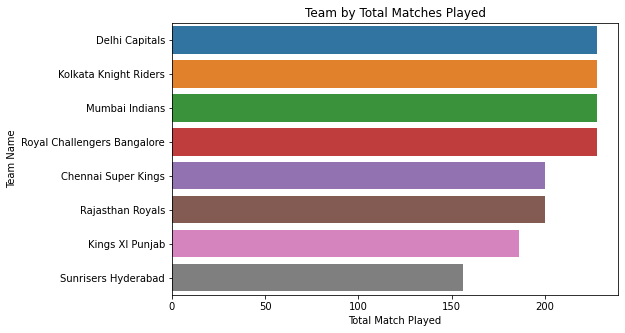

In [141]:
plt.figure(figsize=(8,5))
sns.barplot(x=mp.values,y=mp.index)
plt.xlabel("Total Match Played")
plt.ylabel("Team Name")
plt.title("Team by Total Matches Played")
plt.show()

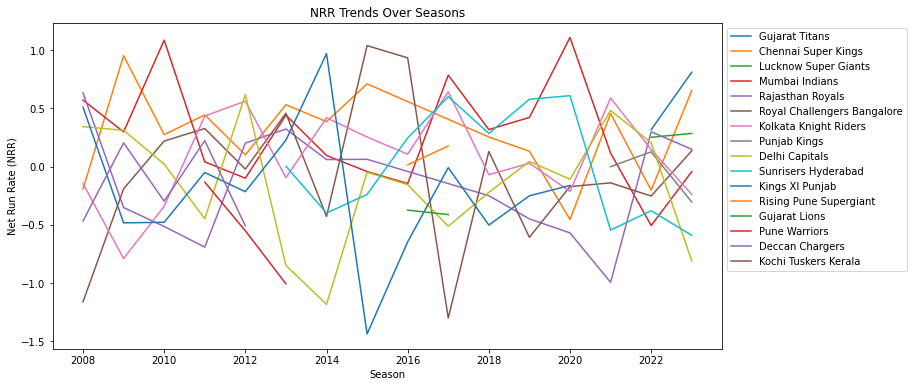

In [142]:
team_names = pt['name'].unique()
plt.figure(figsize=(12, 6))

for team in team_names:
    team_data = pt[pt['name'] == team]  
    plt.plot(team_data['season'], team_data['nrr'], label=team)

plt.xlabel('Season')
plt.ylabel('Net Run Rate (NRR)')
plt.title('NRR Trends Over Seasons')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Enter Year for which you want Top Performers by NRR (2008-2023): 2012


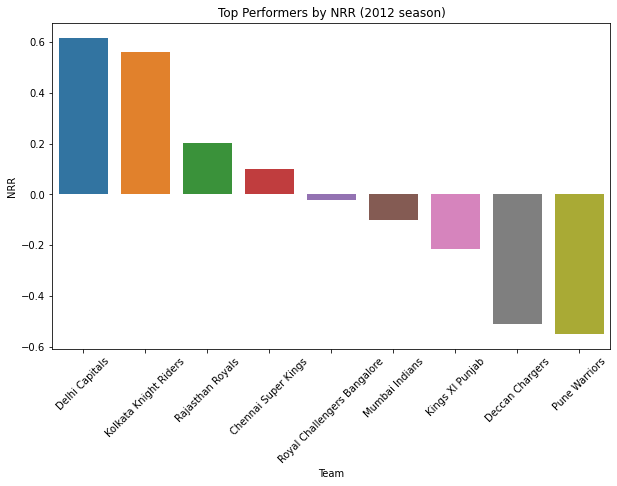

In [143]:
x=int(input("Enter Year for which you want Top Performers by NRR (2008-2023): "))
top_nrr_teams = pt[pt['season'] == x].nlargest(12, 'nrr') 
plt.figure(figsize=(10, 6))

sns.barplot(x='name', y='nrr', data=top_nrr_teams)
plt.xlabel('Team')
plt.ylabel('NRR')
plt.title(f'Top Performers by NRR ({x} season)')
plt.xticks(rotation=45)
plt.show()

In [144]:
pt['name'].unique()

array(['Gujarat Titans', 'Chennai Super Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Punjab Kings', 'Delhi Capitals', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Pune Warriors', 'Deccan Chargers', 'Kochi Tuskers Kerala'],
      dtype=object)

Enter name of team 1 : Chennai Super Kings
Enter name of team 2 : Mumbai Indians


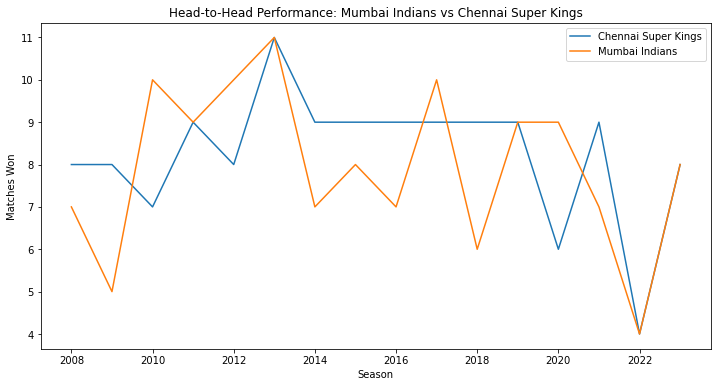

In [145]:
team1 = input("Enter name of team 1 : ")
team2 = input("Enter name of team 2 : ")

head_to_head = pt[((pt['name'] == team1) | (pt['name'] == team2))]
plt.figure(figsize=(12, 6))

sns.lineplot(x='season', y='matcheswon', hue='name', data=head_to_head)
plt.xlabel('Season')
plt.ylabel('Matches Won')
plt.title(f'Head-to-Head Performance: {team2} vs {team1}')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.show()


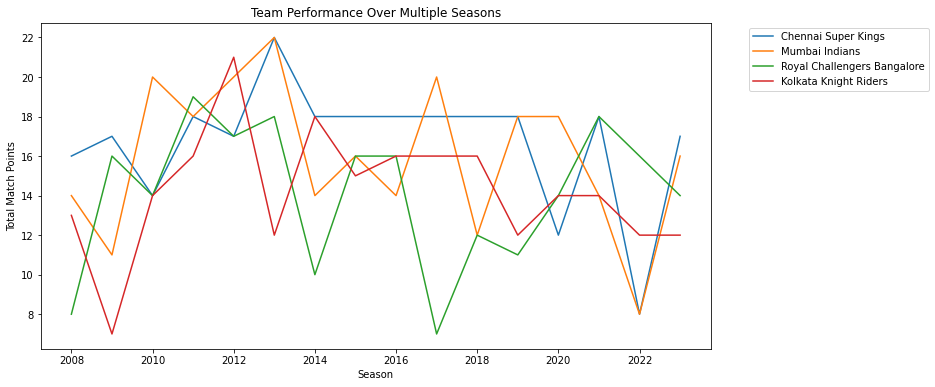

In [146]:
teams_to_plot = ['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders','Royal Challengers Bangalore']  # Add teams of your choice
team_performance = pt[pt['name'].isin(teams_to_plot)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='matchpoints', hue='name', data=team_performance)
plt.xlabel('Season')
plt.ylabel('Total Match Points')
plt.title('Team Performance Over Multiple Seasons')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
